In [2]:
from tsplotter import *
import rosbag
from tsbagger import *
from postrunplotter import *

In [14]:
folder_path = 'data/box_09-10-23/box-with-rot_2min_09-10-23'
input_bag_name = 'BagIn.bag'
output_bag_name = 'BagOut.bag'
do_ts = False
opti_imu_time_gain = 0
ts, opti, imu = get_files(folder_path, do_ts=do_ts)

Files found:
TS File: None
Opti File: 1696854681535611.csv
IMU File: LOG_20231009T133121_STIM.dat.updated.csv



## Plot NED

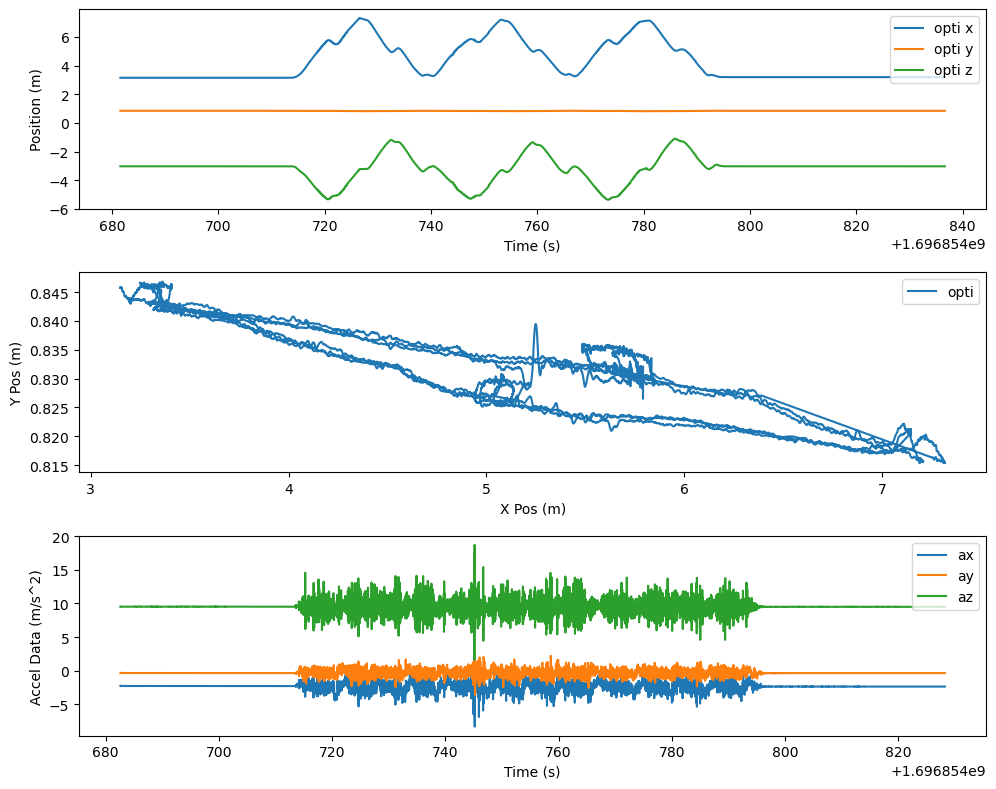

In [12]:
plot(ts, cam_to_ned(opti), imu, do_ts=do_ts)

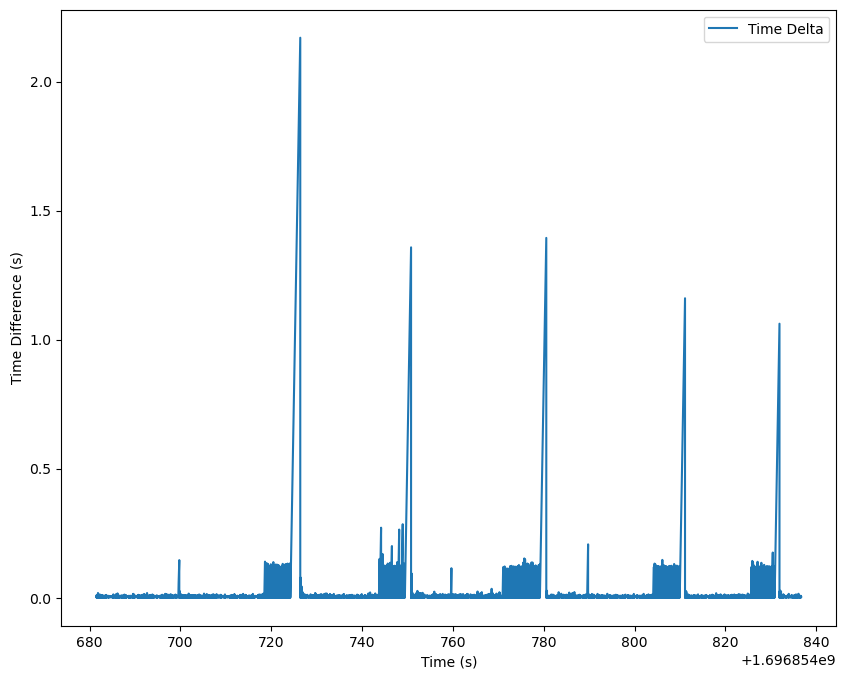

In [13]:
opti['time_diff'] = opti['time'].diff()
# Create three separate plots
plt.figure(figsize=(10, 8))

plt.plot(opti['time'], opti['time_diff'], label='Time Delta')
plt.ylabel('Time Difference (s)')
plt.xlabel('Time (s)')
plt.legend()

In [15]:
opti = time_shift(cam_to_mars(opti), opti_imu_time_gain)
imu = rmars_to_mars(imu)
imu = chop_first(imu, seconds = 1)

bag = rosbag.Bag(os.path.join(folder_path, input_bag_name), 'w')

write_imu(imu, bag)
write_opti(opti, bag)

bag.close()
print(f"DataFrame data from '{folder_path}' has been packed into '{input_bag_name}'")

DataFrame data from 'data/box_09-10-23/box-with-rot_2min_09-10-23' has been packed into 'BagIn.bag'


Final Mars States:
position1_orientation: [-0.04320714258288973, -0.11605690261286353, 0.4738814266535542, -0.8718373309617582]
core_init_bw: [-0.0003582191660044922, -5.670244046398318e-05, 0.00017024840604629746]
core_init_ba: [0.017293914249357216, -0.024681971310114865, -0.022025740799025417]



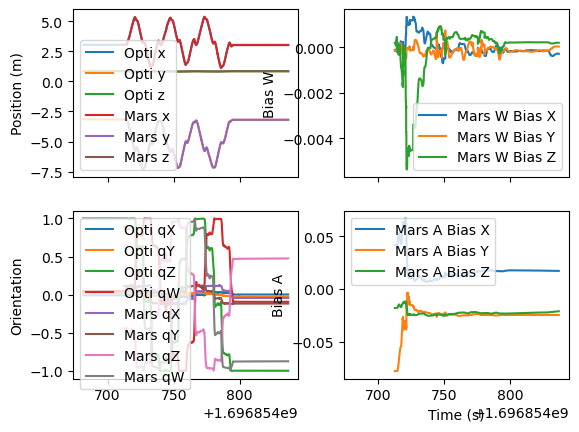

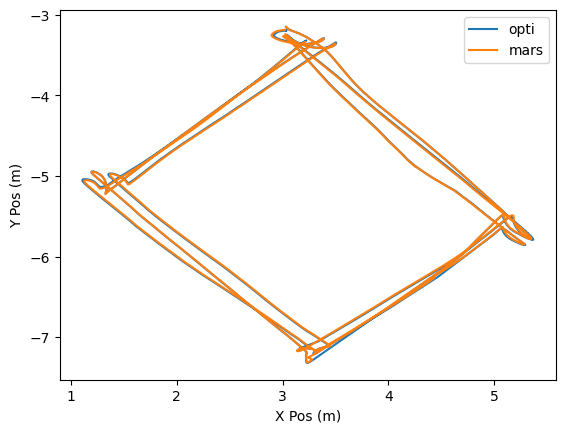

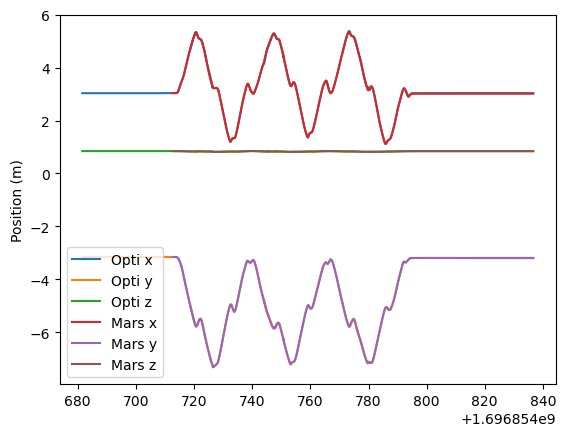

In [19]:
#opti = time_shift(cam_to_mars(opti), opti_imu_time_gain)


mars = read_out(os.path.join(folder_path, output_bag_name))

final_states(mars)

mars = chop_first(mars, seconds = 30)


plot_out(opti,ts,mars, do_ts = do_ts)

In [ ]:
mars = read_out(os.path.join(folder_path, 'Output.bag'))
#mars_out = chop_first(mars_out, seconds = 30)

ts, opti, _ = get_files(folder_path)
#opti = transform_opti(opti, time = opti_imu_time_gain)
ts = transform_ts(ts, time=ts_opti_time_gain)

add_vector(mars, offset_vector = np.array([0.0439, 0.0224, 0.01365]))

#opti = mars_to_ned(opti)
print(mars[['qx', 'qy', 'qz', 'qw']].head(3))
opti = cam_to_ned(opti)


mars = mars_to_ned(mars)
#mars = transform_ts(mars, new_rotation_matrix = ts_rot, translation = ts_trans)

print(mars[['qx', 'qy', 'qz', 'qw']].head(3))
ts = mars_to_ned(ts)

#opti = rotate_ned(opti,0,0,180)
mars2 = quaternions_to_euler_angles(mars)
print(f"Mars:\n{mars2[['ex', 'ey', 'ez']].head(3)}")
opti2 = quaternions_to_euler_angles(opti)
print(f"Opti:\n{opti2[['ex', 'ey', 'ez']].head(3)}")
#opti2 = adjust_heading(opti2, 0,0, -131.1958)
#exit(1)
write_conversions(ts, mars, opti)